<a href="https://colab.research.google.com/github/liyueling13/Predicting-Banned-Books/blob/main/6)_Banned_Books_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6) Banned Books - Classification

Let's see if we can use the features we engineered from book desriptions to predict whether a book is banned.

11/10/23

## Setup

In [1]:
# this performs line wrapping on output text in Colab

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Data Science/Springboard assignments/Capstone Three/Banned Books')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Train/Test Split and Dummy Classifier Baseline

In [6]:
prediction_df = pd.read_csv('prediction_df.csv')
prediction_df

,author,title,label,description,nyt_author,school_friendship_and_love,award_winning_childrens,young_woman_protag,gender_and_sexuality,race_and_america,families_and_home,middle_and_high_school,classics,vampire_novel,boy_protagonist,fantasy,lgbtq_sexuality,girl_protagonist
0,Arundhati Roy,The God of Small Things,1,debut novel affluent indian family fateful day...,0.03352,0.02454,0.01418,0.00123,0.00000,0.00000,0.08860,0.00000,0.10248,0.0,0.02749,0.00000,0.00000,0.00032
1,Kevin Noble Maillard,Fry Bread,1,winner robert sibert informational book medal ...,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
2,Kevin Noble Maillard,Fry Bread,1,winner robert sibert informational book medal ...,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
3,Kevin Noble Maillard,Fry Bread,1,winner robert sibert informational book medal ...,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
4,Kevin Noble Maillard,Fry Bread,1,winner robert sibert informational book medal ...,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,Arvin Ahmadi,How It All Blew Up,1,simon homo sapiens agenda italy ahmadi newest ...,0.01078,0.07607,0.00000,0.01401,0.01718,0.01964,0.08449,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000
1731,Jaye Robin Brown,The Key to You and Me,1,sweet funny lgbtq romance perfect fan becky al...,0.00678,0.10552,0.01222,0.00000,0.00000,0.00244,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.09311
1732,Victoria Jamieson,When Stars Are Scattered,1,national book award finalist remarkable graphi...,0.03275,0.00535,0.02473,0.01480,0.00000,0.00000,0.07097,0.03407,0.02942,0.0,0.01365,0.00000,0.00000,0.03165
1733,Megan Atwood,Raise the Stakes,1,audisee audio combine professional narration s...,0.00454,0.00977,0.00000,0.00000,0.01535,0.00000,0.00895,0.00000,0.01380,0.0,0.00867,0.00000,0.02394,0.02217


In [7]:
prediction_df.columns

Index(['author', 'title', 'label', 'description', 'nyt_author',
       'school_friendship_and_love', 'award_winning_childrens',
       'young_woman_protag', 'gender_and_sexuality', 'race_and_america',
       'families_and_home', 'middle_and_high_school', 'classics',
       'vampire_novel', 'boy_protagonist', 'fantasy', 'lgbtq_sexuality',
       'girl_protagonist'],
      dtype='object')

In [14]:
prediction_df['label'].value_counts()

1    1043
0     692
Name: label, dtype: int64

In [17]:
# baseline: if we predicted all banned, we'd get 60% accuracy

1043/(1043+692)

0.6011527377521614

In [11]:
X = prediction_df.loc[:, 'nyt_author':]
X

,nyt_author,school_friendship_and_love,award_winning_childrens,young_woman_protag,gender_and_sexuality,race_and_america,families_and_home,middle_and_high_school,classics,vampire_novel,boy_protagonist,fantasy,lgbtq_sexuality,girl_protagonist
0,0.03352,0.02454,0.01418,0.00123,0.00000,0.00000,0.08860,0.00000,0.10248,0.0,0.02749,0.00000,0.00000,0.00032
1,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
2,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
3,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
4,0.01759,0.00000,0.27830,0.00000,0.00000,0.01119,0.00848,0.00853,0.00000,0.0,0.00000,0.01092,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,0.01078,0.07607,0.00000,0.01401,0.01718,0.01964,0.08449,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000
1731,0.00678,0.10552,0.01222,0.00000,0.00000,0.00244,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.09311
1732,0.03275,0.00535,0.02473,0.01480,0.00000,0.00000,0.07097,0.03407,0.02942,0.0,0.01365,0.00000,0.00000,0.03165
1733,0.00454,0.00977,0.00000,0.00000,0.01535,0.00000,0.00895,0.00000,0.01380,0.0,0.00867,0.00000,0.02394,0.02217


In [9]:
y = prediction_df['label']
y

0       1
1       1
2       1
3       1
4       1
       ..
1730    1
1731    1
1732    1
1733    1
1734    0
Name: label, Length: 1735, dtype: int64

In [12]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [32]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f"Accuracy Score on Training Set for Dummy Classifier: {dummy.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Dummy Classifier: {dummy.score(X_test, y_test):.3f}")

# the dummy classifier indeed gives 60%ish accuracy

Accuracy Score on Training Set for Dummy Classifier: 0.595
Accuracy Score on Test Set for Dummy Classifier: 0.625


## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
# we'll use class_weight = "balanced"
# since our data is not completely balanced

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.3f}")

# well at 76%-80%, this is already a lot better!

Accuracy Score on Training Set for Logistic Regression: 0.804
Accuracy Score on Test Set for Logistic Regression: 0.769


In [ ]:
# params for logreg: penalty = l2, C: 1, solver=lbfgs

In [49]:
# let's try finding best params with cv

kf = KFold(n_splits=5, shuffle=True, random_state=111)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'solver': ['liblinear', 'newton-cg', 'lbfgs'],
          "class_weight": ['balanced']}

logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
logreg_cv.fit(X_train, y_train)

print(f"Tuned Logistic Regression Parameters: {logreg_cv.best_params_}")
print(f"Tuned Logistic Regression Best Accuracy Score: {logreg_cv.best_score_}")
print(f"Tuned Logistic Regression Test Set Accuracy Score: {logreg_cv.score(X_test, y_test):.3f}")

# it's not a dramatic improvement
# let's keep our earlier parameters but change C=0.1

Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 0.1}
Tuned Logistic Regression Best Accuracy Score: 0.8033322078799054
Tuned Logistic Regression Test Set Accuracy Score: 0.772


In [54]:
# we'll keep our earlier parameters but change C=0.1
# this is our final logreg model

logreg = LogisticRegression(C=0.1, class_weight='balanced')
logreg.fit(X_train, y_train)
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.3f}")

Accuracy Score on Training Set for Logistic Regression: 0.805
Accuracy Score on Test Set for Logistic Regression: 0.772


## K Nearest Neighbors

In [112]:
# no way to balance classes here

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1, 50, 2),
        "weights": ['uniform', 'distance'],
         'p': [1, 2]}
knn_cv = RandomizedSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [120]:
print(f"Tuned KNN Classifier Best Parameters: {knn_cv.best_params_}")
print(f"Tuned KNN Classifier Best Accuracy Score: {knn_cv.best_score_:.3f}")
print(f"Tuned KNN Classifier Best Accuracy on Test Set: {knn_cv.score(X_test, y_test):.3f}")

# accuracy scores are very close to LogReg

Tuned KNN Classifier Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 35}
Tuned KNN Classifier Best Accuracy Score: 0.790
Tuned KNN Classifier Best Accuracy on Test Set: 0.772


In [124]:
# saving our best model

knn = knn_cv.best_estimator_

In [130]:
# we want to see if the feature coefficients are similar
# but KNN doesn't have features in the same way

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)
perm_importance.importances_mean

array([0.00999039, 0.0326609 , 0.03717579, 0.01517771, 0.01373679,
       0.02555235, 0.02007685, 0.03006724, 0.02497598, 0.01498559,
       0.02776177, 0.00787704, 0.04178674, 0.03563881])

In [131]:
knn_coefs = [x for x in perm_importance.importances_mean]
knn_coefs

[0.009990393852065326,
 0.032660902977905866,
 0.03717579250720462,
 0.015177713736791538,
 0.013736791546589818,
 0.025552353506243988,
 0.02007684918347743,
 0.030067243035542746,
 0.024975984630163303,
 0.014985590778097984,
 0.02776176753121999,
 0.007877041306436128,
 0.04178674351585014,
 0.035638808837656084]

In [132]:
knn_feature_names = [x for x in knn.feature_names_in_]
# knn_coefs = [x for x in perm_importance.importances_mean]

knn_feats = {}

for i in range(len(knn_feature_names)):
  knn_feats[knn_feature_names[i]] = knn_coefs[i]

knn_feats

{'nyt_author': 0.009990393852065326,
 'school_friendship_and_love': 0.032660902977905866,
 'award_winning_childrens': 0.03717579250720462,
 'young_woman_protag': 0.015177713736791538,
 'gender_and_sexuality': 0.013736791546589818,
 'race_and_america': 0.025552353506243988,
 'families_and_home': 0.02007684918347743,
 'middle_and_high_school': 0.030067243035542746,
 'classics': 0.024975984630163303,
 'vampire_novel': 0.014985590778097984,
 'boy_protagonist': 0.02776176753121999,
 'fantasy': 0.007877041306436128,
 'lgbtq_sexuality': 0.04178674351585014,
 'girl_protagonist': 0.035638808837656084}

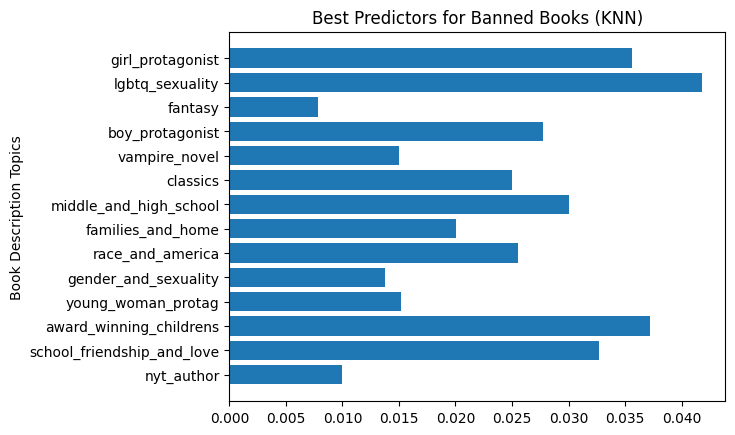

In [134]:
names = list(knn_feats.keys())
values = list(knn_feats.values())

plt.barh(range(len(knn_feats)), values, tick_label=names)
plt.title('Best Predictors for Banned Books (KNN)')
plt.ylabel('Book Description Topics')
# plt.savefig('Banned_KNN_Coefficients.png', bbox_inches='tight')
plt.show()

In [ ]:
# interesting, these predictors are a bit different
# lgbtq sexuality, award winning children's, girl protagonist seem the highest

## Decision Tree and Random Forest

In [136]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
params = {"criterion": ['gini', 'entropy', 'log_loss'],
        "splitter": ['best', 'random'],
         'max_depth': [5, 10, 25, 50, None]}
dtc_cv = RandomizedSearchCV(dtc, params, cv=5)
dtc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 25, 50, None],
                                        'splitter': ['best', 'random']})

In [138]:
print(f"Tuned Decision Tree Classifier Best Parameters: {dtc_cv.best_params_}")
print(f"Tuned Decision Tree Classifier Best Accuracy Score: {dtc_cv.best_score_:.3f}")
print(f"Tuned Decision Tree Classifier Best Accuracy on Test Set: {dtc_cv.score(X_test, y_test):.3f}")

# not as good as before!

Tuned Decision Tree Classifier Best Parameters: {'splitter': 'random', 'max_depth': 10, 'criterion': 'gini'}
Tuned Decision Tree Classifier Best Accuracy Score: 0.727
Tuned Decision Tree Classifier Best Accuracy on Test Set: 0.712


In [139]:
# can we get something much better with RF?

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X_train, y_train)

RandomForestClassifier()

In [140]:
print(f"Tuned Random Forest Classifier Best Accuracy Score: {RF.score(X_train, y_train):.3f}")
print(f"Tuned Random Forest Classifier Best Accuracy on Test Set: {RF.score(X_test, y_test):.3f}")

# overfits on training set!

Tuned Random Forest Classifier Best Accuracy Score: 1.000
Tuned Random Forest Classifier Best Accuracy on Test Set: 0.769


In [144]:
# RF with Randomized Search CV

params = {"criterion": ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 10, 25, 50, None],
          'max_features': ['sqrt', 'log2', None],
          'class_weight': ['balanced']}
RF_cv = RandomizedSearchCV(RF, params, cv=5)
RF_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 25, 50, None],
                                        'max_features': ['sqrt', 'log2', None]})

In [145]:
print(f"Tuned Decision Tree Classifier Best Parameters: {RF_cv.best_params_}")
print(f"Tuned Random Forest Classifier Best Accuracy Score: {RF_cv.best_score_:.3f}")
print(f"Tuned Random Forest Classifier Best Accuracy on Test Set: {RF_cv.score(X_test, y_test):.3f}")

Tuned Decision Tree Classifier Best Parameters: {'max_features': 'log2', 'max_depth': 10, 'criterion': 'log_loss', 'class_weight': 'balanced'}
Tuned Random Forest Classifier Best Accuracy Score: 0.800
Tuned Random Forest Classifier Best Accuracy on Test Set: 0.761


In [ ]:
# not too much of an improvement!
# we'll stick with logreg for interpretability

## Exploring LogReg

All of our models performed roughly the same. For maximum interpretability, we'll move forward with our Logreg model.

*   Which features are most important?
*   Which books in the test set were predicted incorrectly?



In [56]:
print(logreg.feature_names_in_)
print(logreg.coef_)

['nyt_author' 'school_friendship_and_love' 'award_winning_childrens'
 'young_woman_protag' 'gender_and_sexuality' 'race_and_america'
 'families_and_home' 'middle_and_high_school' 'classics' 'vampire_novel'
 'boy_protagonist' 'fantasy' 'lgbtq_sexuality' 'girl_protagonist']
[[-0.30446749  0.33390362  0.42006635 -0.14299132  0.47204904  0.30001912
   0.16321329  0.43860227 -0.80645773 -0.54317355  0.35669574 -0.35093343
   0.42230453  0.42310507]]


In [59]:
logreg_feature_names = [x for x in logreg.feature_names_in_]
logreg_coefs = [x for x in logreg.coef_]

In [67]:
logreg_coefs[0][1]

0.33390361732064355

In [68]:
logreg_feats = {}

for i in range(len(logreg_feature_names)):
  logreg_feats[logreg_feature_names[i]] = logreg_coefs[0][i]

logreg_feats

{'nyt_author': -0.3044674910699949,
 'school_friendship_and_love': 0.33390361732064355,
 'award_winning_childrens': 0.4200663459980325,
 'young_woman_protag': -0.14299132268283637,
 'gender_and_sexuality': 0.47204904300675,
 'race_and_america': 0.30001911921834995,
 'families_and_home': 0.16321328731034643,
 'middle_and_high_school': 0.43860226527218743,
 'classics': -0.8064577332335722,
 'vampire_novel': -0.5431735466943955,
 'boy_protagonist': 0.3566957420509783,
 'fantasy': -0.3509334336097347,
 'lgbtq_sexuality': 0.4223045297514484,
 'girl_protagonist': 0.42310507100886585}

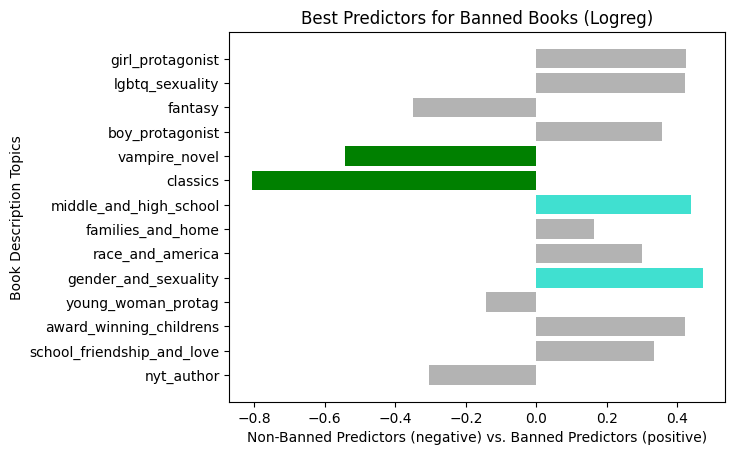

In [135]:
names = list(logreg_feats.keys())
values = list(logreg_feats.values())

plt.barh(range(len(logreg_feats)), values, tick_label=names,
         color=('0.7',
                '0.7',
                '0.7',
                '0.7',
                'turquoise',
                '0.7',
                '0.7',
                'turquoise',
                'green',
                'green',
                '0.7',
                '0.7',
                '0.7',
                '0.7'))
plt.title('Best Predictors for Banned Books (Logreg)')
plt.xlabel('Non-Banned Predictors (negative) vs. Banned Predictors (positive)')
plt.ylabel('Book Description Topics')
# plt.savefig('Banned_Logreg_Coefficients.png', bbox_inches='tight')
plt.show()

In [73]:
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)
confusion_matrix(y_test, y_pred)

array([[ 95,  35],
       [ 44, 173]])

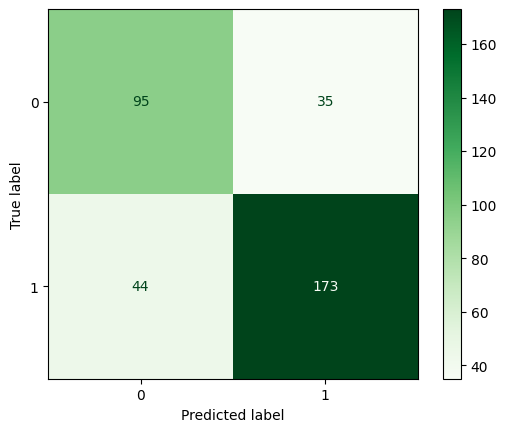

In [74]:
# vis of confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [202]:
y_probs

array([[0.48854006, 0.51145994],
       [0.49743869, 0.50256131],
       [0.51019136, 0.48980864],
       [0.48460474, 0.51539526],
       [0.5043484 , 0.4956516 ],
       [0.48735199, 0.51264801],
       [0.50158709, 0.49841291],
       [0.51699069, 0.48300931],
       [0.5042881 , 0.4957119 ],
       [0.49801995, 0.50198005],
       [0.48233105, 0.51766895],
       [0.47237577, 0.52762423],
       [0.49548384, 0.50451616],
       [0.49607282, 0.50392718],
       [0.48676726, 0.51323274],
       [0.48849273, 0.51150727],
       [0.49734902, 0.50265098],
       [0.49165569, 0.50834431],
       [0.49947358, 0.50052642],
       [0.49657788, 0.50342212],
       [0.51406879, 0.48593121],
       [0.47489937, 0.52510063],
       [0.52077597, 0.47922403],
       [0.48439742, 0.51560258],
       [0.48579015, 0.51420985],
       [0.49445695, 0.50554305],
       [0.4931214 , 0.5068786 ],
       [0.49392605, 0.50607395],
       [0.48295385, 0.51704615],
       [0.49376712, 0.50623288],
       [0.

In [204]:
y_proba = y_probs[:, 1]

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy Score on Test Set for Logistic Regression Classifier: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision Score on Test Set for Logistic Regression Classifier: {precision_score(y_test, y_pred):.3f}")
print(f"Recall Score on Test Set for Logistic Regression Classifier: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score on Test Set for Logistic Regression Classifier: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC score on Test Set for Logistic Regression Classifier: {roc_auc_score(y_test, y_proba):.3f}")

Accuracy Score on Test Set for Logistic Regression Classifier: 0.772
Precision Score on Test Set for Logistic Regression Classifier: 0.832
Recall Score on Test Set for Logistic Regression Classifier: 0.797
F1 Score on Test Set for Logistic Regression Classifier: 0.814
ROC-AUC score on Test Set for Logistic Regression Classifier: 0.850


In [211]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
roc_auc

0.8500177242112726

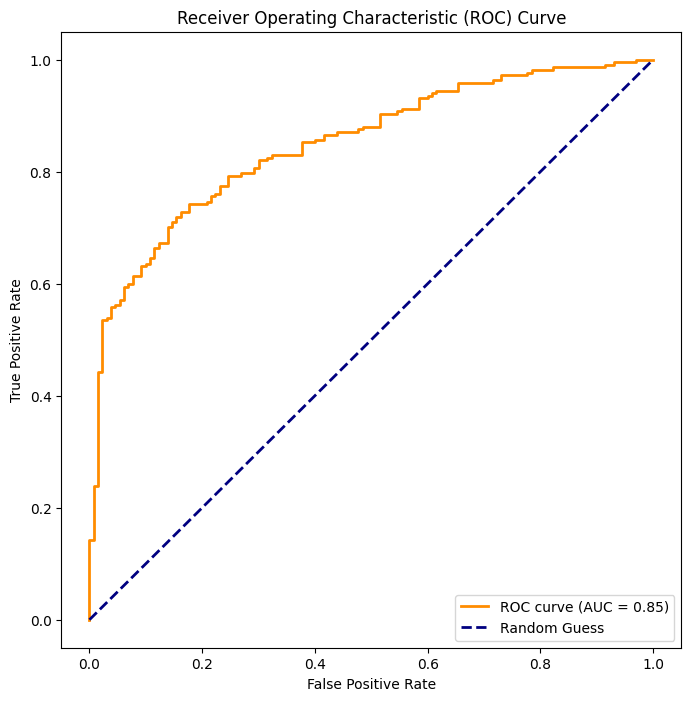

In [212]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [218]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# obviously this is extremely close to 0.5

0.5023608086591508

In [220]:
y_pred_optimal = (y_proba > optimal_threshold).astype(int)
y_pred_optimal

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [223]:
print(f"Accuracy Score for LogReg with Optimal Threshold: {accuracy_score(y_test, y_pred_optimal):.3f}")

# this is actually a bit worse! we'll stick with our original model

Accuracy Score for LogReg with Optimal Threshold: 0.767


In [82]:
# which books were incorrectly predicted in the test set?

different_preds = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
different_preds

[1,
 8,
 18,
 26,
 27,
 30,
 33,
 42,
 49,
 50,
 54,
 56,
 60,
 63,
 67,
 75,
 85,
 90,
 91,
 93,
 97,
 99,
 103,
 106,
 114,
 120,
 123,
 127,
 129,
 133,
 147,
 148,
 151,
 162,
 167,
 168,
 171,
 173,
 177,
 179,
 180,
 195,
 199,
 209,
 212,
 213,
 214,
 217,
 224,
 229,
 234,
 238,
 239,
 241,
 243,
 254,
 258,
 267,
 274,
 279,
 281,
 284,
 288,
 290,
 294,
 301,
 302,
 304,
 305,
 306,
 308,
 312,
 319,
 325,
 333,
 337,
 339,
 340,
 342]

In [95]:
# now we have to match these different predictions
# to the correct index number in y_test

y_test

1295    1
1311    0
437     0
559     1
1217    0
       ..
1213    0
851     1
1077    1
1028    1
1045    1
Name: label, Length: 347, dtype: int64

In [97]:
# here are all the index numbers in y_test

y_list = list(y_test.index)
y_list

[1295,
 1311,
 437,
 559,
 1217,
 1452,
 896,
 827,
 1314,
 1263,
 1708,
 1437,
 1726,
 1308,
 39,
 432,
 572,
 978,
 299,
 883,
 1222,
 382,
 96,
 268,
 1078,
 1589,
 1454,
 1428,
 333,
 1512,
 1641,
 124,
 725,
 623,
 1272,
 18,
 54,
 1144,
 593,
 553,
 1354,
 233,
 339,
 1125,
 930,
 1079,
 1429,
 1588,
 449,
 1185,
 1572,
 565,
 630,
 544,
 454,
 660,
 842,
 145,
 1242,
 548,
 210,
 1493,
 1131,
 1607,
 1182,
 902,
 280,
 1165,
 1473,
 13,
 1608,
 1488,
 588,
 170,
 541,
 1155,
 1334,
 1420,
 1679,
 1629,
 1410,
 1424,
 1661,
 102,
 777,
 563,
 979,
 938,
 159,
 306,
 775,
 1000,
 1307,
 733,
 1087,
 1218,
 1517,
 791,
 965,
 62,
 1136,
 1409,
 1383,
 483,
 363,
 1075,
 1669,
 1639,
 243,
 1219,
 669,
 74,
 1564,
 950,
 1143,
 1207,
 136,
 576,
 224,
 1267,
 1648,
 81,
 895,
 764,
 199,
 568,
 503,
 1258,
 1529,
 149,
 15,
 220,
 803,
 727,
 696,
 1097,
 1358,
 1294,
 155,
 579,
 730,
 242,
 216,
 1704,
 717,
 1120,
 323,
 1046,
 1073,
 1113,
 1306,
 680,
 1019,
 1707,
 909,
 521,


In [98]:
# now we want the index numbers in y_test (put into the list y_list)
# which were predicted to be a different result

different_inds = []

for i in different_preds:
  different_inds.append(y_list[i])

different_inds

[1311,
 1314,
 299,
 1454,
 1428,
 1641,
 623,
 339,
 1185,
 1572,
 454,
 842,
 210,
 1607,
 1165,
 1155,
 563,
 775,
 1000,
 733,
 791,
 62,
 483,
 1669,
 1143,
 1648,
 764,
 1258,
 149,
 727,
 1046,
 1073,
 680,
 723,
 1705,
 1519,
 1501,
 49,
 648,
 316,
 833,
 45,
 1048,
 1543,
 1251,
 340,
 1680,
 1128,
 202,
 181,
 1138,
 186,
 277,
 599,
 1196,
 1360,
 1408,
 1696,
 57,
 1200,
 456,
 1109,
 1210,
 289,
 1492,
 598,
 1281,
 120,
 934,
 893,
 918,
 1084,
 478,
 604,
 1197,
 671,
 1347,
 876,
 1213]

In [99]:
print(len(different_preds))
print(len(y_test))
print(len(y_list))
print(len(different_inds))

79
347
347
79


In [ ]:
# these are the books in y_test that were incorrectly predicted
# by the logreg classifier

In [111]:
different_books = []

for i in different_inds:
  different_books.append((prediction_df.loc[i].author, prediction_df.loc[i].title))

different_books

[('Plato', 'The Republic'),
 ('Ruth Behar', 'Lucky Broken Girl'),
 ('David McCullough', 'John Adams'),
 ('Jamie McGuire', 'Beautiful Disaster'),
 ('Malcolm Gladwell', 'Blink'),
 ('Muriel Barberry', 'The Elegance of the Hedgehog'),
 ('Lesa Cline-Ransome', 'Before She Was Harriet'),
 ('Francene Sabin', 'Elizabeth Blackwell, the First Woman Doctor'),
 ('Simon J. Ortiz', 'The People Shall Continue'),
 ('Ann Patchett', 'Commonwealth'),
 ('Robin Stevenson', 'En el bosque'),
 ('Nicholas Sparks', 'The Rescue'),
 ('John Irving', 'The Cider House Rules'),
 ('Justin Richardson', 'And Tango Makes Three'),
 ('F. T. Lukens', 'In Deeper Waters'),
 ('Rainbow Rowell', 'Carry On'),
 ('Cynthia Chin-Lee', 'Amelia to Zora'),
 ('Sara Gruen', 'Water for Elephants'),
 ('Jonathan Safran Foer', 'Extremely Loud & Incredibly Close'),
 ('Francine Rivers', 'Redeeming Love'),
 ('Lorraine Hansberry', 'A Raisin in the Sun'),
 ('Eric Devine', 'Look Past'),
 ('Emma Donoghue', 'The Pull of the Stars'),
 ('John Green', 'W

In [185]:
prediction_df[prediction_df.index.isin(different_inds)]

,author,title,label,description,nyt_author,school_friendship_and_love,award_winning_childrens,young_woman_protag,gender_and_sexuality,race_and_america,families_and_home,middle_and_high_school,classics,vampire_novel,boy_protagonist,fantasy,lgbtq_sexuality,girl_protagonist
45,Eric Braun,Protest Movements,1,discus main concern protest movement amazon com,0.00000,0.00459,0.00000,0.00017,0.00000,0.03289,0.00000,0.00000,0.00000,0.00000,0.00142,0.00000,0.00300,0.00000
49,Kim Taylor Blakemore,Bowery Girl,1,willa award author taylor blakemore poignant h...,0.04877,0.00875,0.01480,0.10701,0.00680,0.00000,0.00299,0.00292,0.02466,0.00000,0.00000,0.00000,0.00000,0.07349
57,P.C. Cast and Kristin Cast,Burned,0,zoey fate hang balance friend otherworld serio...,0.00000,0.06377,0.00000,0.00000,0.00079,0.00304,0.00000,0.00000,0.00000,0.00123,0.00000,0.00131,0.00000,0.00000
62,Eric Devine,Look Past,1,someone mary mathison daughter prominent conse...,0.00279,0.00411,0.00000,0.02748,0.05243,0.00000,0.00227,0.00111,0.00000,0.04317,0.02825,0.00000,0.00636,0.00000
120,Sophie Kinsella,Twenties Girl,0,lara lington overactive imagination imaginatio...,0.00590,0.01708,0.01430,0.05520,0.00000,0.00562,0.03415,0.00000,0.00306,0.00000,0.00165,0.00888,0.00000,0.09481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Kate Morton,The Forgotten Garden,0,child first world war little girl ship austral...,0.00000,0.02267,0.01685,0.13145,0.00000,0.00000,0.00816,0.00000,0.00953,0.00148,0.00000,0.00000,0.00000,0.10183
1669,John Green,"Will Grayson, Will Grayson",0,cold night unlikely corner chicago grayson cro...,0.01940,0.05170,0.00000,0.00865,0.00000,0.00000,0.00000,0.05903,0.00252,0.00133,0.00000,0.01285,0.00191,0.00000
1680,Nicholas Sparks,The Choice,0,opposite new york time love medical student ma...,0.04161,0.08434,0.00000,0.05688,0.00534,0.00000,0.04023,0.00360,0.00000,0.00175,0.00391,0.00000,0.00000,0.00000
1696,Jeffrey Eugenides,The Virgin Suicides,0,virgin suicide story disintegration american f...,0.00000,0.00000,0.00000,0.00000,0.00000,0.03155,0.09121,0.00000,0.00000,0.00000,0.13969,0.00000,0.00000,0.00839


In [192]:
wrong_test_preds = prediction_df[prediction_df.index.isin(different_inds)]
wrong_test_preds = wrong_test_preds.loc[:, ['author', 'title', 'label']]
wrong_test_preds

,author,title,label
45,Eric Braun,Protest Movements,1
49,Kim Taylor Blakemore,Bowery Girl,1
57,P.C. Cast and Kristin Cast,Burned,0
62,Eric Devine,Look Past,1
120,Sophie Kinsella,Twenties Girl,0
...,...,...,...
1648,Kate Morton,The Forgotten Garden,0
1669,John Green,"Will Grayson, Will Grayson",0
1680,Nicholas Sparks,The Choice,0
1696,Jeffrey Eugenides,The Virgin Suicides,0


In [193]:
wrong_test_preds.to_csv('wrong_test_preds.csv', index=False)

In [194]:
wrong_test_preds_full = prediction_df[prediction_df.index.isin(different_inds)]
wrong_test_preds_full.to_csv('wrong_test_preds_full.csv', index=False)

# in case we want to explore further

## Conclusion

Our dummy classifier gave us 60% accuracy or under, our Logistic Regression model gives 77% on the test set. Moreover our other metrics also do well.

Parameters: penalty = l2, C = 0.1, solver = lbfgs, class_weights = balanced

In [196]:
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.3f}")

# params for logreg: penalty = l2, C: 0.1, solver=lbfgs, class_weights=balanced

Accuracy Score on Training Set for Logistic Regression: 0.805
Accuracy Score on Test Set for Logistic Regression: 0.772


In [224]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy Score on Test Set for Logistic Regression Classifier: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision Score on Test Set for Logistic Regression Classifier: {precision_score(y_test, y_pred):.3f}")
print(f"Recall Score on Test Set for Logistic Regression Classifier: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score on Test Set for Logistic Regression Classifier: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC score on Test Set for Logistic Regression Classifier: {roc_auc_score(y_test, y_proba):.3f}")

Accuracy Score on Test Set for Logistic Regression Classifier: 0.772
Precision Score on Test Set for Logistic Regression Classifier: 0.832
Recall Score on Test Set for Logistic Regression Classifier: 0.797
F1 Score on Test Set for Logistic Regression Classifier: 0.814
ROC-AUC score on Test Set for Logistic Regression Classifier: 0.850


In [146]:
# save this model

from sklearn import __version__ as sklearn_version
import datetime
import pickle
logreg.version = 1.0
logreg.pandas_version = pd.__version__
logreg.numpy_version = np.__version__
logreg.sklearn_version = sklearn_version
logreg.X_columns = [col for col in X_train.columns]
logreg.build_datetime = datetime.datetime.now()

In [ ]:
savedmodel = 'banned_logreg_predictions.pkl'
pickle.dump(logreg, open(savedmodel, 'wb'))